# Analiza knjig


Analizirala bom 2400 najboljših knjig s seznama _nekaj_ spletne strani [GoodReads](https://www.goodreads.com/)

Sprva bomo naložili zajete podatke:

In [2]:
import pandas as pd
import os.path

pd.options.display.max_rows = 20

knjige = pd.read_csv(os.path.join('obdelani-podatki', 'knjige.csv'), index_col='id')
zanri = pd.read_csv(os.path.join('obdelani-podatki', 'zanri.csv'))

Poglejmo podatke. Zajeli smo:
* avotrja,
* naslov,
* oceno,
* število glasov,
* število strani,
* leto,
* ali je del serije

In [5]:
knjige

,avtor,naslov,ocena,glasovi,strani,leto,serija
id,,,,,,,
1,Suzanne Collins,"The Hunger Games (The Hunger Games, #1)",4.32,6589817,374.0,2008,True
2,J.K. Rowling,Harry Potter and the Order of the Phoenix (Har...,4.50,2608155,870.0,2003,True
3,Harper Lee,To Kill a Mockingbird,4.28,4673257,324.0,1960,False
4,Jane Austen,Pride and Prejudice,4.27,3108362,279.0,1813,False
5,Stephenie Meyer,"Twilight (Twilight, #1)",3.61,5131640,501.0,2005,True
...,...,...,...,...,...,...,...
2394,Colleen Hoover,"Never Never (Never Never, #1)",4.06,72574,300.0,2015,True
2397,Brandon Mull,"Keys to the Demon Prison (Fablehaven, #5)",4.44,71900,593.0,2010,True
2397,Tana French,"The Likeness (Dublin Murder Squad, #2)",4.05,132533,466.0,2008,True


## 1. osnovni podatki

Najprej poglejmo, kakšno je povprečje glasov, strani in ocen, da bomo kasneje lažje ocenili, kako rezultati odstopajo od povprečja. Poglejmo tudi maksimalne in minimalne vrednosti.

In [10]:
round(knjige[['ocena', 'glasovi', 'strani']].mean(), 2)

ocena           4.07
glasovi    230770.65
strani        417.38
dtype: float64

In [11]:
knjige[['ocena', 'glasovi', 'strani']].max()

ocena            4.82
glasovi    7362544.00
strani        5216.00
dtype: float64

Največje število strani se nam zdi previsoko. Preverimo katere knjige imajo zelo visoko število strani.

In [44]:
knjige[(knjige.strani > 1600)]

,avtor,naslov,ocena,glasovi,strani,leto,serija
id,,,,,,,
9,J.R.R. Tolkien,J.R.R. Tolkien 4-Book Boxed Set: The Hobbit an...,4.60,113229,1728.0,1955,False
144,Laura Ingalls Wilder,"The Little House Collection (Little House, #1-9)",4.34,143786,2700.0,1971,True
286,Arthur Conan Doyle,The Complete Sherlock Holmes,4.47,179722,1796.0,1927,False
409,J.K. Rowling,"Harry Potter Series Box Set (Harry Potter, #1-7)",4.72,258358,4100.0,2007,True
480,Stephenie Meyer,"The Twilight Collection (Twilight, #1-3)",3.80,44105,1690.0,2007,True
921,Robert Musil,The Man Without Qualities,4.23,5760,1774.0,1930,False
1107,L.M. Montgomery,The Complete Anne of Green Gables Boxed Set (A...,4.44,101739,2088.0,1908,True
1133,E.L. James,"Fifty Shades Trilogy (Fifty Shades, #1-3)",4.11,115162,1859.0,2005,True
1319,Christopher Paolini,"Eragon, Eldest &amp; Brisingr (Inheritance, #1-3)",4.23,32537,1952.0,2008,True


Število strani je tako visoko, ker je v enem naslovu združena cela serija knjig. Teh knjig v prihodnje ne bomo obravnavali, saj imamo knjige iz serij zabeležene tudi posamično.

In [12]:
knjige[['ocena', 'glasovi', 'strani']].min()

ocena       3.11
glasovi    38.00
strani      0.00
dtype: float64

Zmoti nas, da imajo nekatere knjige 0 strani. To se je zgodilo, ker nekatere knjige na spletni strani nimajo zabeleženega števila strani. Preverimo, koliko je takih knjig.

In [19]:
knjige[(knjige.strani == 0)]

,avtor,naslov,ocena,glasovi,strani,leto,serija
id,,,,,,,
1503,Ayn Rand,Atlas Shrugged &amp; The Fountainhead,4.1,4575,0.0,1995,False


Sedaj dodatno prefiltriramo podatke.

In [3]:
knjige = knjige[(knjige.strani > 0) & (knjige.strani < 1600)]

Sedaj se lotimo prvega vprašanja. Kateri avtor je najbolj priljubljen. Preverili bomo torej, kateri avtor se je na seznamu pojavil največkrat. Predpostavimo, da je to Stephen King, saj ima dolgoletno kariero, širok opus, veliko njegovih del pa je bilo adaptiranih za film, kar je njegova dela spoznalo še s širšim občinstvom.

In [59]:
po_avtorjih = knjige.groupby('avtor')
po_avtorjih.size().sort_values(ascending=False).head(5)

avtor
Stephen King           34
Terry Pratchett        22
Rick Riordan           19
Nicholas Sparks        17
William Shakespeare    16
dtype: int64

Rezultat ni presenetljiv. Vsi avtorji so napisali ogromno knjig, ki so bile v veliko primerih upodobljene v film.

## 2. Analiza gledo na leto

Sprva bomo v razpredelnico dodali dva dodatna stolpca, v katerem stoletju in v katerem desetletju je bila knjiga izdana. Ker smo analizirali zgolj 2400 knjig bodo tako rezultati bolj pregledni. Nato bomo preverili v katerem stoletju in katerem desetletju so najpopularnejše knjige.

<AxesSubplot:xlabel='stoletje'>

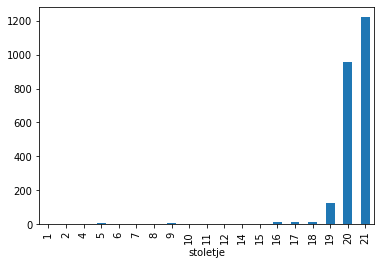

In [47]:
knjige['stoletje'] = (knjige.leto // 100) + 1
knjige['desetletje'] = 10 * (knjige.leto // 10)
knjige.groupby('stoletje').size().plot.bar()

Opazimo, da je glavnina "najboljših" knjig izšla v zadnjih stotih letih. To ni presenetljivo, saj spletno stran v večini uporabljajo amaterski bralci, ki pretežno berejo trenutno priljubljene knjige, prav tako pa bilo v tem obdobju izdano več knjige kot kadar koli prej. Kasneje bomo tudi preverili, kako dobro je na strani ocenjena "klasična" literatura in kako pogosto je brana. Preverimo še, katera desetletja so najpopularnejša. Na podlagi prejšnih rezultatov se omejimo zgolj na 20. in 21. stoletje. Pričakujemo da bo največ knjig iz leta 2000 in 2010, saj pred tem spletna stran še ni obstajala.

<AxesSubplot:xlabel='desetletje'>

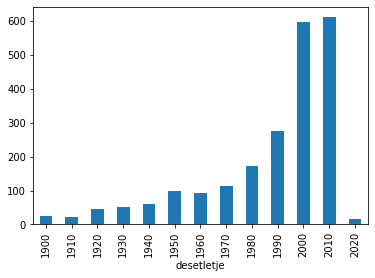

In [48]:
knjige_19_20 = knjige[(knjige.stoletje >= 20)]
knjige_19_20.groupby('desetletje').size().plot.bar()

Rezultat ni presenetljiv. Sedaj pa preverimo še, če je tudi kvaliteta knjig naraščala skozi stoletja.

(3.5, 4.3)

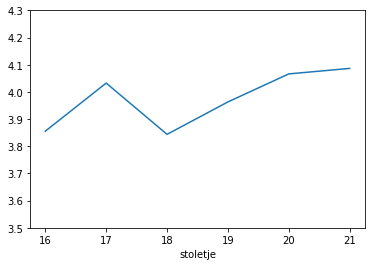

In [41]:
knjige[
    (knjige.stoletje > 15)
].groupby(
    'stoletje'
).ocena.mean(
).plot(
).set_ylim(3.5, 4.3)

Ugotovimo, da kvaliteta skozi leta ni strogo naraščala, opazimo pa, da sta 16. in 18. stoletje nekoliko manj priljubljeni. To je lahko posledica številnih obveznih domačih branj renesančnih, romantičnih in realističnih del, ki jih v sklopu šolanja beremo skoraj vsi narodi. Ni pa popolnoma jasno, zakaj je 17. stoletje toliko bolj priljubljeno.

## 2. Popularnost serij

V tem delu se bomo posvetili knjigam, ki so del neke serije. Včasih so vse romane izdajali po delih (navadno po poglavjih) v raznih časopisih, tako da so bili vsi v nekem pogledu serije. Tu pa bomo analizirali serije, katerih posamezni deli so samostojne knjige (ki so lahko med seboj vsebinsko povezane). Predpostavljamo, da so take knjige skozi desetletja naraščale.

<AxesSubplot:title={'center':'Ali je del serije?'}, ylabel='None'>

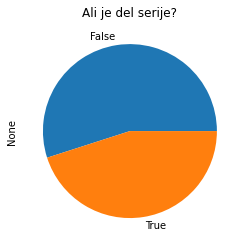

In [73]:
knjige.groupby('serija').size().plot.pie(title=('Ali je del serije?'))

Vidimo, da so serije precej popularne. Predstavljajo skoraj polovico vseh najbolših knjig. Najprej bomo preverili, če so se serije sploh pojavljale pred 20. stoletjem.

In [78]:
knjige[(knjige.serija)].groupby('stoletje').size()

stoletje
5       2
18      1
19     11
20    290
21    765
dtype: int64

Kot smo pričakovali, se pred 19. stoletjem serije skoraj niso pojavljale. Sedaj nas zanima, kako se je število serij večalo skozi desetletja.

<AxesSubplot:xlabel='desetletje'>

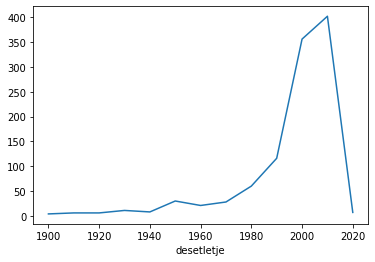

In [81]:
knjige_19_20[(knjige_19_20.serija)].groupby('desetletje').size().plot()

Serije so zares popularne šele zadnjih trideset let. Leta 2020 je padec tako strm, ker se je desetletje šele začelo.

## 3. število strani

Na začetku smo ugotovili, da je imajo knjige s seznama povprečno okoli 400 strani. Predpostavimo, da imajo knjige z več stranmi boljšo oceno. Sama bi namreč dolgo knjigo prebrala le v primeru, ko bi pričakovala, da mi bo všeč, pri kratkih knjigah pa se pustim tudi presenetiti.

<AxesSubplot:xlabel='strani', ylabel='ocena'>

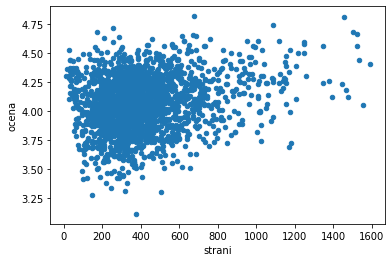

In [82]:
knjige.plot.scatter('strani', 'ocena')

Ugotovimo, da je res največji razpon ocen pri kratkih knjigah, dolge pa so praviloma tudi dobro ocenjene. Za lastne potrebe bom perverila še, katere so najboljše knjige, ki imajo manj kot sto strani, vendar vsaj 100000 glasov.

In [108]:
knjige[(knjige.strani < 100) & (knjige.glasovi > 100000)].sort_values('ocena', ascending=False).head(5)

,avtor,naslov,ocena,glasovi,strani,leto,serija,stoletje,desetletje
id,,,,,,,,,
324,Jon Stone,The Monster at the End of this Book,4.44,121369,32.0,1971,False,20,1970
13,Shel Silverstein,The Giving Tree,4.37,934890,64.0,1964,False,20,1960
1838,Alan Moore,Batman: The Killing Joke,4.37,174297,50.0,1988,False,20,1980
660,Clement C. Moore,The Night Before Christmas,4.37,112743,32.0,1823,False,19,1820
2204,Sam McBratney,Guess How Much I Love You,4.36,128735,20.0,1988,False,20,1980


## 4. Žanri

V zadnjem razdelku bomo preverili, kateri žanri so najbolj priljubljeni in njihovo odvisnost od prejšnih parametrov. Sprva spojimo našo osnovno razpredelnico z razpredelnico žanrov. Nato poglejmo, koliko razlicnih zanrov smo zajeli. Za vsako knjigo smo zajeli prvih pet žanrov. Na spletni strani žanre določijo uporabniki, zato pričakujemo, da jih bo veliko in da bodo neobičajno poimenovana. 

In [51]:
knjige_z_zanri = pd.merge(knjige, zanri, left_on='id', right_on='knjiga')
knjige_z_zanri.groupby('zanr').size().count()

282

Za 2400 knjig je skoraj 300 različnih žanrov res veliko. Poglejmo kateri so najbolj in kateri najmanj priljubljeni.

<AxesSubplot:xlabel='zanr'>

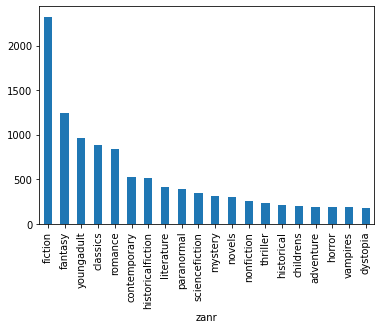

In [50]:
st_posameznih_zanrov = knjige_z_zanri.groupby('zanr').size()
st_posameznih_zanrov.sort_values(ascending=False).head(20).plot.bar()

st_posameznih_zanrov.sort_values().head(10)

Vidimo, da so nekateri žanri označeni zgolj enkrat in imajo res absurdna imena. Tudi med najpogostejšimi so oznake nekonsistentne, nekateri pojmi so preveč splošni, na primer "fikcija", po drugi strani pa je pojem "vampirji" zelo specifičen in je verjetno postal popularen v zadnjem destletju. To lahko hitro preverimo. Sedaj pa se posvetimo žanru "young adult", ki je na seznamu med najbolj priljubenimi, še bolj je priljubjen od klasik. Verjamemo, da je tudi ta žanr postal popularen šele v zadnjih dveh desetletjih.

<AxesSubplot:xlabel='desetletje'>

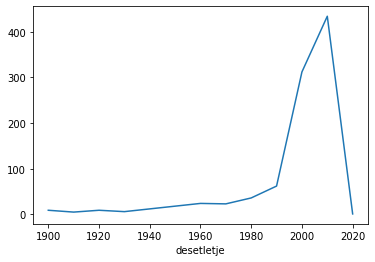

In [56]:
knjige_z_zanri[(knjige_z_zanri.zanr == 'youngadult') & (knjige_z_zanri.desetletje >= 1900)].groupby(
'desetletje').size(
).plot()

Naša predpostavka je bila pravilna. Verjamemo, da je v primeru klasik graf ravno obraten. Preverimo.

<ipython-input-69-4b14615867bc>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  klasike[(knjige_z_zanri.desetletje >= 1900)].groupby(


<AxesSubplot:xlabel='desetletje'>

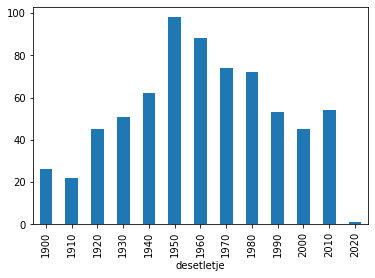

In [69]:
klasike = knjige_z_zanri[(knjige_z_zanri.zanr == 'classics')]
klasike[(knjige_z_zanri.desetletje >= 1900)].groupby(
    'desetletje').size(
).plot.bar()

Rezultati so zelo presenetljvi. Sodeč po uporabnikih spletne strani naj bi bilo v zadnjem desetletju celo več klasik kot v začetku 20. stoletja. Ugotovimo, da je pojem klasike zelo subjektiven. Sama menim, da si oznako klasike zaslužijo tiste knjige, ki pokažejo svojo obstojnost, inovativnost in inovativnost, česar jim ne moramo pripisati tako hitro, ampak šele v retrospekciji. Preverimo katere so najpopularnejše klasike zadnjih desetih let.

In [71]:
klasike[(klasike.desetletje == 2010)].sort_values('glasovi', ascending=False).head(10)

,avtor,naslov,ocena,glasovi,strani,leto,serija,stoletje,desetletje,knjiga,zanr
15313,Celeste Ng,Little Fires Everywhere,4.10,784631,368.0,2017,False,21,2010,2381,classics
5081,Nicola Yoon,"Everything, Everything",4.05,405907,306.0,2015,False,21,2010,1006,classics
14247,Christina Baker Kline,Orphan Train,4.17,381877,278.0,2013,False,21,2010,2282,classics
15417,Ashlee Vance,"Elon Musk: Tesla, SpaceX, and the Quest for a ...",4.21,260650,392.0,2015,False,21,2010,2390,classics
15416,Ashlee Vance,"Elon Musk: Tesla, SpaceX, and the Quest for a ...",4.21,260650,392.0,2015,False,21,2010,2390,classics
11752,Fredrik Backman,"Beartown (Beartown, #1)",4.25,229600,432.0,2016,True,21,2010,2025,classics
4424,Tammara Webber,"Easy (Contours of the Heart, #1)",4.08,219490,336.0,2012,True,21,2010,879,classics
8660,Stephen King,Doctor Sleep,4.11,207031,531.0,2013,False,21,2010,1621,classics
7488,Vanessa Diffenbaugh,The Language of Flowers,4.08,197978,323.0,2011,False,21,2010,1439,classics
9879,Patti Smith,Just Kids,4.15,189329,304.0,2010,False,21,2010,1802,classics


Za konec bomo preverili še, kakšna je povezava med oznako klasike in številom strani ter kateri pisatelji so napisali največ klasik. Predvidevamo, da število strani nima vpliva na to, ali je delo operedeljeno kot klasika

<AxesSubplot:xlabel='avtor'>

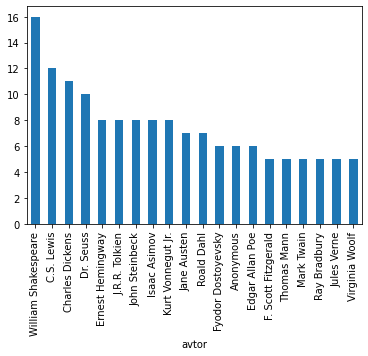

In [76]:
klasike.groupby('avtor').size().sort_values(ascending=False).head(20).plot.bar()

Rezultati niso preveč presenetljivi. Opazimo, da so večinoma angleško govoreči avtorji. Sklepamo, da spletno stran uporabaljajo angleško govoreči narodi.